# Numerical differentiation and Richardson's extrapolation

_(Jupyter notebook by Simone Brugiapaglia)_

In this notebook we will illustrate numerical differentiation formulas and Richardson's extrapolation.

For more details, see Chapter 20 of 

*Q. Kong, T. Siauw, and A. M. Bayen. Python Programming and Numerical Methods: A Guide for Engineers and Scientists. Academic Press, 2021. (https://pythonnumericalmethods.berkeley.edu/)*

and Sections 4.1 and 4.2

*Richard L. Burden, J. Douglas Faires and Annette M. Burden. Numerical Analysis (10th Edition). Cengage, 2016.*

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

## Implementation of finite difference formulas

We start by defining Python functions that implement the backward, forward, and midpoint (3-point) finite difference formulas.

In [2]:
# Backward difference formula
def bwd_diff(f,x,h): 
    """
    Backward difference formula.
    """
    return (f(x)-f(x-h)) / h

# Forward difference formula
def fwd_diff(f,x,h):
    """
    Forward difference formula.
    """
    return (f(x+h)-f(x)) / h

# Midpoint 3-point formula
def mid_diff(f,x,h):
    """
    Midpoint 3-point difference formula.
    """
    return (f(x+h)-f(x-h)) / (2*h)

## Validation and comparison of finite difference formulas using a simple test function

We consider the function $f(x) = \sin(0.5 x^2)$ on the interval $[-3, 5]$. This is a simple test function and we can explicitly find its first derivative $f'(x) = \cos(0.5 x^2) x$. This allows us to compute the approximation errors of finite difference formulas that will be tested later. Let's start by visualizing $f(x)$ and $f'(x)$.

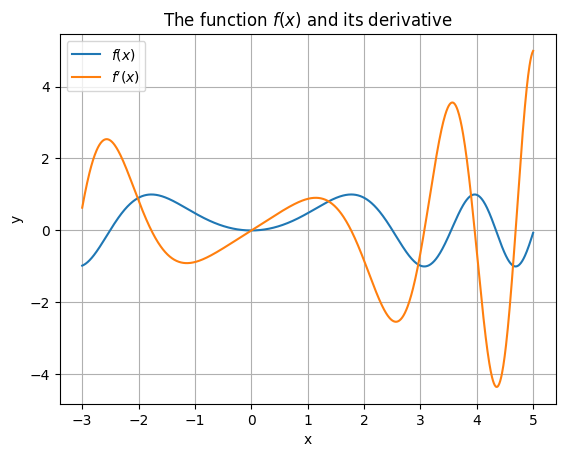

In [3]:
# Define the function f and its derivative Df
f = lambda x: np.sin(0.5 * x**2)
Df = lambda x: np.cos(0.5 * x**2) * 0.5 * 2 * x

# Create a fine grid for visualization
x_grid = np.linspace(-3,5,1000);

# Visualize f and its derivative
plt.plot(x_grid, f(x_grid), label = '$f(x)$')
plt.plot(x_grid, Df(x_grid), label = '$f\'(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('The function $f(x)$ and its derivative')
plt.grid()
plt.show()

We test the three finite difference formulas just implemented to approximate the derivative of $f$. We visualize the approximations of $f'(x)$ and the corresponding absolute errors at a grid of equispaced points of stepsize $h$.

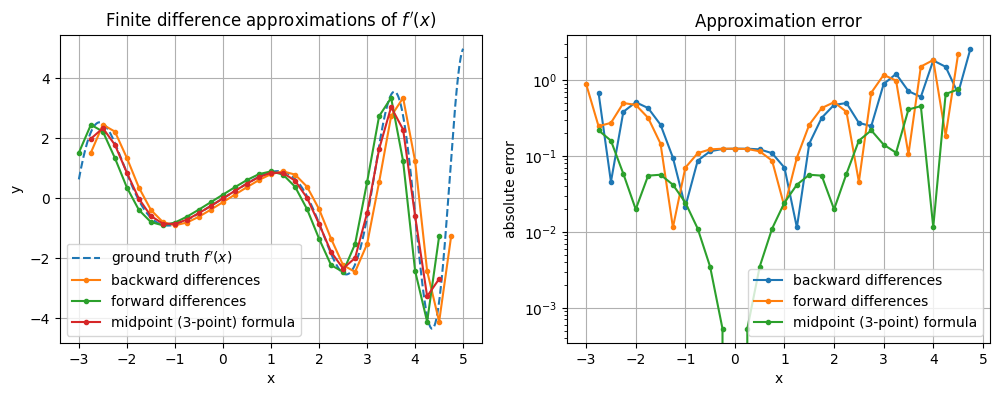

In [5]:
# Create grid of step size h
# Note that we will use a different grids for each formula in order to avoid considering points outside of the interval of interest
h = 0.25
x_grid_h = np.arange(0-3, 5,h)
x_grid_h_bwd = x_grid_h[1:]
x_grid_h_fwd = x_grid_h[:-1]
x_grid_h_mid = x_grid_h[1:-1]

# Apply finite difference formulas
Df_approx_bwd = bwd_diff(f, x_grid_h_bwd, h)
Df_approx_fwd = fwd_diff(f, x_grid_h_fwd, h)
Df_approx_mid = mid_diff(f, x_grid_h_mid, h)

# Compure approximation errors at the grid points
Err_bwd = np.abs(Df(x_grid_h_bwd) - Df_approx_bwd)
Err_fwd = np.abs(Df(x_grid_h_fwd) - Df_approx_fwd)
Err_mid = np.abs(Df(x_grid_h_mid) - Df_approx_mid)


# Visualize results
plt.figure(figsize = (12,4))

plt.subplot(121)
plt.plot(x_grid, Df(x_grid), '--', label = 'ground truth $f\'(x)$')
plt.plot(x_grid_h_bwd, Df_approx_bwd, '.-', label = 'backward differences')
plt.plot(x_grid_h_fwd, Df_approx_fwd, '.-', label = 'forward differences')
plt.plot(x_grid_h_mid, Df_approx_mid, '.-', label = 'midpoint (3-point) formula')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Finite difference approximations of $f\'(x)$')


plt.subplot(122)
plt.semilogy(x_grid_h_bwd, Err_bwd, '.-', label = 'backward differences')
plt.semilogy(x_grid_h_fwd, Err_fwd, '.-', label = 'forward differences')
plt.semilogy(x_grid_h_mid, Err_mid, '.-', label = 'midpoint (3-point) formula')
plt.grid()
plt.xlabel('x')
plt.ylabel('absolute error')
plt.legend()
plt.title('Approximation error')


plt.show()

## Convergence plot

We know from Taylor's remainder formula that backward and forward differences have approximation error $O(h)$ and the midpoint (3-point) formula has error $O(h^2)$. We now verify this numerically via a convergence plot.

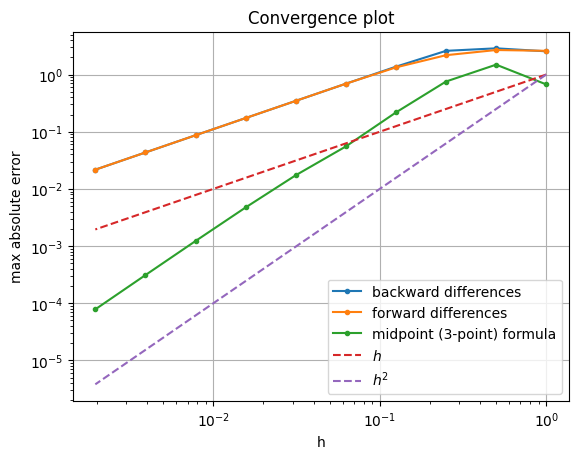

In [6]:
# grid of h values
h_vals = 2.0**(-np.arange(10))

# Initialize arrays to store approximation errors
Err_vals_bwd = np.array([], dtype=np.int64).reshape(0,1)
Err_vals_fwd = np.array([], dtype=np.int64).reshape(0,1)
Err_vals_mid = np.array([], dtype=np.int64).reshape(0,1)

# repeat steps made above for different values of h
i_h = 0
for h in h_vals:
    x_grid_h = np.arange(0-3, 5,h)
    
    x_grid_h_bwd = x_grid_h[1:]
    x_grid_h_fwd = x_grid_h[:-1]
    x_grid_h_mid = x_grid_h[1:-1]
    
    Df_approx_bwd = bwd_diff(f, x_grid_h_bwd, h)
    Df_approx_fwd = fwd_diff(f, x_grid_h_fwd, h)
    Df_approx_mid = mid_diff(f, x_grid_h_mid, h)
    
    Err_vals_bwd = np.vstack((Err_vals_bwd, np.max(np.abs(Df(x_grid_h_bwd) - Df_approx_bwd))))
    Err_vals_fwd = np.vstack((Err_vals_fwd, np.max(np.abs(Df(x_grid_h_fwd) - Df_approx_fwd))))
    Err_vals_mid = np.vstack((Err_vals_mid, np.max(np.abs(Df(x_grid_h_mid) - Df_approx_mid))))


# visualize convergence plot
plt.loglog(h_vals, Err_vals_bwd, '.-', label = 'backward differences')
plt.loglog(h_vals, Err_vals_fwd, '.-', label = 'forward differences')
plt.loglog(h_vals, Err_vals_mid, '.-', label = 'midpoint (3-point) formula')
plt.loglog(h_vals, h_vals, '--', label = '$h$')
plt.loglog(h_vals, h_vals**2, '--', label = '$h^2$')
plt.grid()
plt.xlabel('h')
plt.ylabel('max absolute error')
plt.legend()
plt.title('Convergence plot')

plt.show()

## Richardson's extrapolation

To illustrate Richardson's extrapolation, we apply it to the backward finite difference formula. Recall that, in general,  Richardson's extrapolation allows one to leverage the knowledge of the order of convergence of a formula in order to create a new formula with higher order of convergence. We implement Richardson's extrapolation for generic formulas $F(h)$ with approximation error $O(h)$.


In [7]:
def Richardson_1st_order(F, h):
    """
    Implements Richardson's extrapolation on a formula F(h), assuming that its approximation error is O(h).
    """
    return 2 * F(h/2) - F(h)

We now apply Richardson's extrapolation to the backward difference formula considered before.

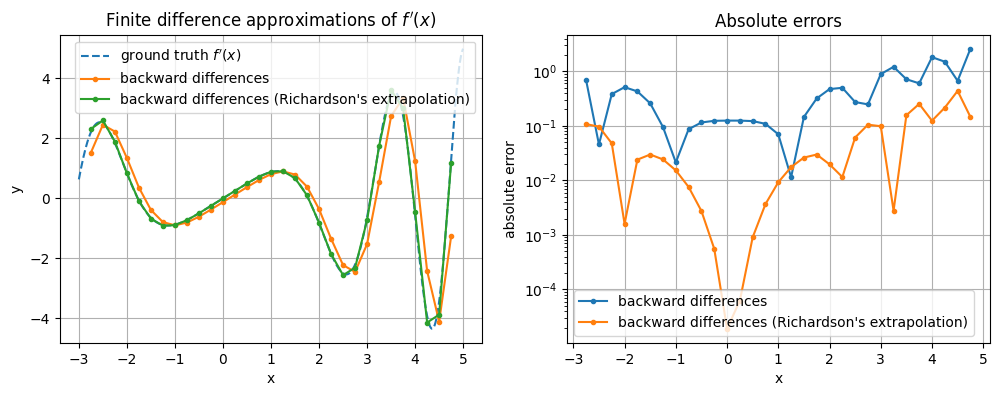

In [8]:
# Create grid of step size h
# Note that we will use a different grids for each formula in order to avoid considering points outside of the interval of interest
h = 0.25
x_grid_h = np.arange(0-3, 5,h)
x_grid_h_bwd = x_grid_h[1:]
x_grid_h_bwd_Rich = x_grid_h[1:]

# Apply backward differences and Richardson's extrapolation
Df_approx_bwd = bwd_diff(f, x_grid_h_bwd, h)
Df_approx_bwd_Rich = Richardson_1st_order(lambda h: bwd_diff(f, x_grid_h_bwd, h), h)

# Compute pointwise approximation errors
Err_bwd = np.abs(Df(x_grid_h_bwd) - Df_approx_bwd)
Err_bwd_Rich = np.abs(Df(x_grid_h_bwd) - Df_approx_bwd_Rich)

# Visualize results
plt.figure(figsize = (12,4))

plt.subplot(121)
plt.plot(x_grid, Df(x_grid), '--', label = 'ground truth $f\'(x)$')
plt.plot(x_grid_h_bwd, Df_approx_bwd, '.-', label = 'backward differences')
plt.plot(x_grid_h_bwd, Df_approx_bwd_Rich, '.-', label = 'backward differences (Richardson\'s extrapolation)')
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Finite difference approximations of $f\'(x)$')

plt.subplot(122)
plt.semilogy(x_grid_h_bwd, Err_bwd, '.-', label = 'backward differences')
plt.semilogy(x_grid_h_bwd_Rich, Err_bwd_Rich, '.-', label = 'backward differences (Richardson\'s extrapolation)')
plt.grid()
plt.xlabel('x')
plt.ylabel('absolute error')
plt.legend()
plt.title('Absolute errors')

plt.show()

In order to numerically check that Richardson's extrapolation improves the order of convergence, we create a convergence plot and compare backwards differences with their extrapolated version.

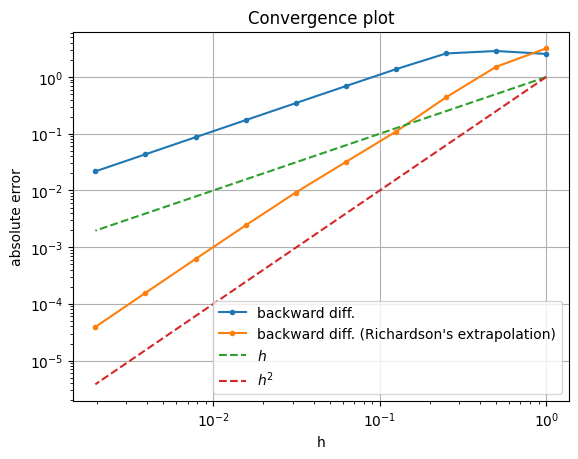

In [9]:
# initialize arrays storing approximation errors
Err_vals_bwd = np.array([], dtype=np.int64).reshape(0,1)
Err_vals_bwd_Rich = np.array([], dtype=np.int64).reshape(0,1)

# apply backward differences and Richardson's extrapolation for different values of h
i_h = 0
for h in h_vals:
    x_grid_h = np.arange(0-3, 5,h)
    
    x_grid_h_bwd = x_grid_h[1:]
    x_grid_h_bwd_Rich = x_grid_h[1:]
    
    Df_approx_bwd = bwd_diff(f, x_grid_h_bwd, h)
    Df_approx_bwd_Rich = Richardson_1st_order(lambda h: bwd_diff(f, x_grid_h_bwd, h), h)
    
    Err_vals_bwd = np.vstack((Err_vals_bwd, np.max(np.abs(Df(x_grid_h_bwd) - Df_approx_bwd))))
    Err_vals_bwd_Rich = np.vstack((Err_vals_bwd_Rich, np.max(np.abs(Df(x_grid_h_bwd_Rich) - Df_approx_bwd_Rich))))

# Visualize results
plt.loglog(h_vals, Err_vals_bwd, '.-', label = 'backward diff.')
plt.loglog(h_vals, Err_vals_bwd_Rich, '.-', label = 'backward diff. (Richardson\'s extrapolation)')
plt.loglog(h_vals, h_vals, '--', label = '$h$')
plt.loglog(h_vals, h_vals**2, '--', label = '$h^2$')
plt.grid()
plt.xlabel('h')
plt.ylabel('absolute error')
plt.legend()
plt.title('Convergence plot')

plt.show()

Using Richardson's extrapolation, we gained one order of convergence, as expected!

## Recommended problems

- Compare the forward, backward, and midpoint finite difference formulas on more test functions. Can you find an example where the midpoint formula is *not* substantially more accurate that backward and forward differences?
- Create Python functions that implement finite difference formulas without using the parameter $h$ as input, but only a given array representing a given grid of equispaced points. These functions should return the approximate derivative values at (a subset of) the gridpoints.
- Implement and test Richardson's extrapolation on the midpoint 3-point formula. Use a convergence plot to show that you can obtain a new formula with $O(h^3)$ error.